In [8]:
import pdfplumber
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Chemin du fichier PDF
pdf_path = "fichier1.pdf"  # Modifie le chemin si besoin

# Extraction du tableau
with pdfplumber.open(pdf_path) as pdf:
    for page in pdf.pages:
        tables = page.extract_tables()  # Récupère toutes les tables de la page
        for table in tables:
            df = pd.DataFrame(table[1:], columns=table[0])  # Convertir en DataFrame
            print(df)  # Afficher le tableau sous forme de DataFrame

                                                           Control  \
0                            Final BW per 1000 birds    kg    2135   
1                           Live broiler sales price  €/kg    1.50   
2                             Revenue per 1000 birds     €  3202.5   
3                         Feed intake per 1000 birds    kg  4006.6   
4                    Cost of additive per 1000 birds     €           
5                    Total feed cost per 1000 birds*     €  1561.8   
6  Contribution margin per 1000 birds\n(=Revenue-...     €  1640.7   
7                                 ROI per 1000 birds                 

  Digestarom® P.E.P. Difference  
0               2210      75.00  
1               1.50             
2               3315     112.50  
3             4062.1       55.5  
4               12.7             
5             1596.1       34.3  
6             1718.9       78.2  
7                6.2             


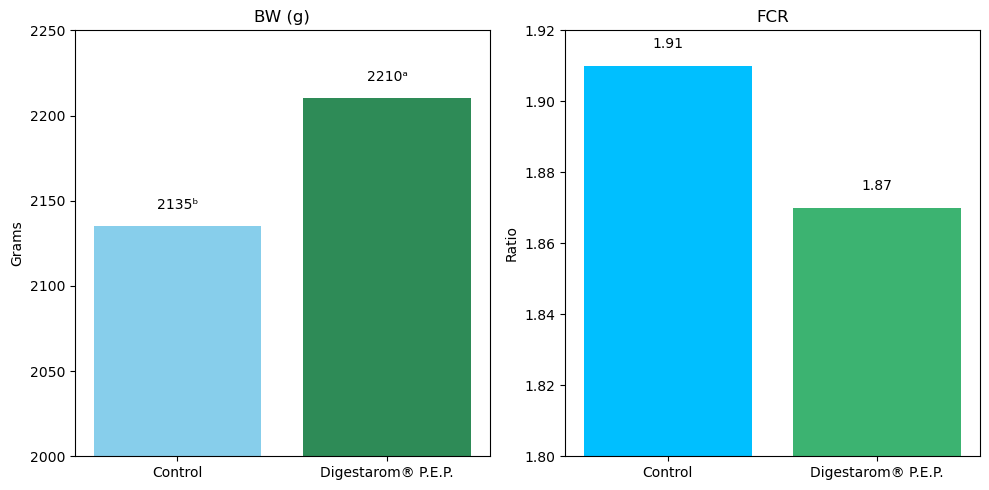

In [9]:


# Données pour BW (Body Weight)
labels = ['Control', 'Digestarom® P.E.P.']
bw_values = [2135, 2210]

# Données pour FCR (Feed Conversion Ratio)
fcr_values = [1.91, 1.87]

# Création des sous-graphes côte à côte
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Diagramme pour BW
axs[0].bar(labels, bw_values, color=['skyblue', 'seagreen'])
axs[0].set_title('BW (g)')
axs[0].set_ylim(2000, 2250)
axs[0].text(0, bw_values[0] + 10, '2135ᵇ', ha='center')
axs[0].text(1, bw_values[1] + 10, '2210ᵃ', ha='center')

# Diagramme pour FCR
axs[1].bar(labels, fcr_values, color=['deepskyblue', 'mediumseagreen'])
axs[1].set_title('FCR')
axs[1].set_ylim(1.80, 1.92)
axs[1].text(0, fcr_values[0] + 0.005, '1.91', ha='center')
axs[1].text(1, fcr_values[1] + 0.005, '1.87', ha='center')

# Titres des axes Y
axs[0].set_ylabel('Grams')
axs[1].set_ylabel('Ratio')

# Affichage
plt.tight_layout()
plt.show()


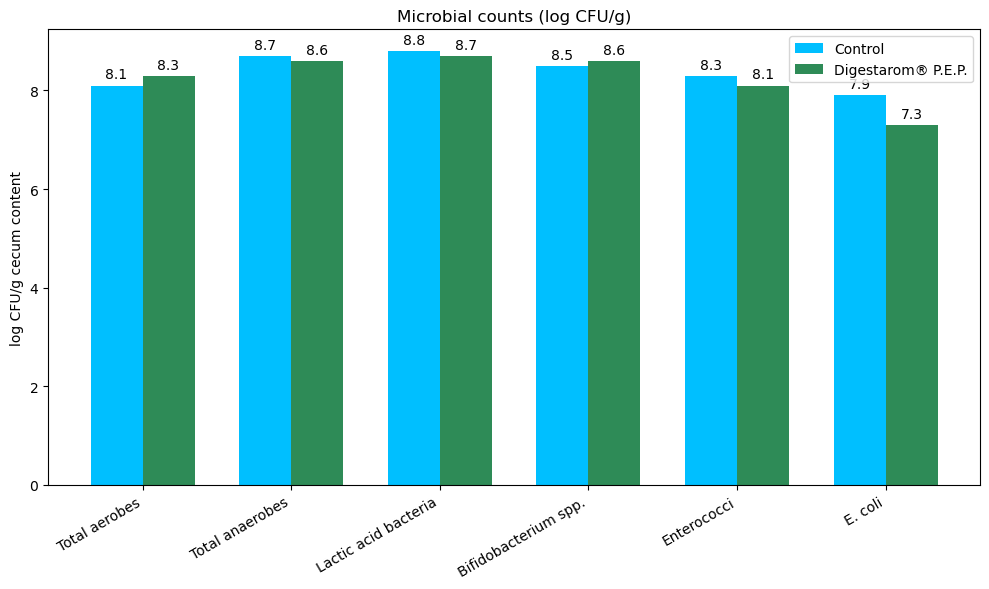

In [10]:
# Étiquettes des groupes de microbes
categories = [
    'Total aerobes',
    'Total anaerobes',
    'Lactic acid bacteria',
    'Bifidobacterium spp.',
    'Enterococci',
    'E. coli'
]

# Données estimées à partir du graphique
control = [8.1, 8.7, 8.8, 8.5, 8.3, 7.9]
digestarom = [8.3, 8.6, 8.7, 8.6, 8.1, 7.3]

x = np.arange(len(categories))  # positions des groupes
width = 0.35  # largeur des barres

fig, ax = plt.subplots(figsize=(10, 6))

# Barres
bars1 = ax.bar(x - width/2, control, width, label='Control', color='deepskyblue')
bars2 = ax.bar(x + width/2, digestarom, width, label='Digestarom® P.E.P.', color='seagreen')

# Titres et légendes
ax.set_ylabel('log CFU/g cecum content')
ax.set_title('Microbial counts (log CFU/g)')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=30, ha='right')
ax.legend()

# Affichage des valeurs sur les barres
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


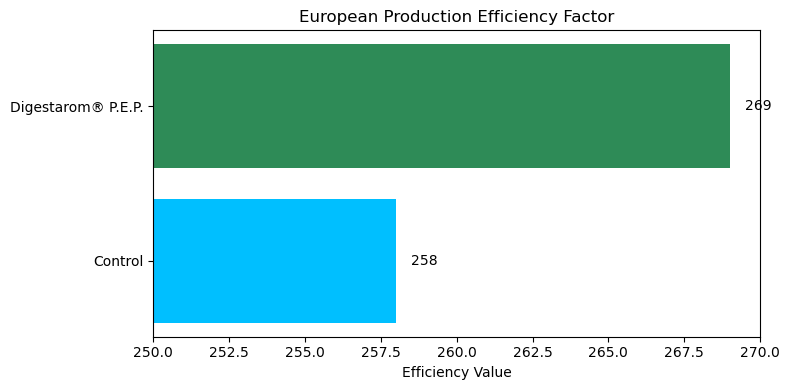

In [11]:

# Données
groups = ['Control', 'Digestarom® P.E.P.']
values = [258, 269]
colors = ['deepskyblue', 'seagreen']

# Création du graphique horizontal
fig, ax = plt.subplots(figsize=(8, 4))

bars = ax.barh(groups, values, color=colors)

# Ajout des valeurs sur les barres
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.5, bar.get_y() + bar.get_height()/2,
            f'{int(width)}', va='center')

# Titres et axes
ax.set_title('European Production Efficiency Factor')
ax.set_xlim(250, 270)
ax.set_xlabel('Efficiency Value')

plt.tight_layout()
plt.show()
